In [1]:
%load_ext autoreload
%autoreload 2

import pickle
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats
import m_D_plots as plot

In [2]:
plt_params = {
    "axes.labelsize": "xx-large",
    "axes.titlesize": "xx-large",
    "xtick.labelsize": "xx-large",
    "ytick.labelsize": "xx-large",
    "legend.title_fontsize": 12,
}
plt.rcParams["font.family"] = "serif"
plt.rcParams.update(plt_params)

In [3]:
'''
variables:
    agg_as = aggregate major radius from fit ellipsoid
    agg_bs = aggregate middle radius from fit ellipsoid
    agg_cs = aggregate minor radius from fit ellipsoid
    Aps = area of projected aggregate polygons in x-y plane
    Acs = area of smallest circle fit around projected aggregate in x-y plane
    Vps = volume of aggregate polygons
    Ves = volume of ellipsoid
    Dmaxs = longest axis from vertex to vertex through 3D polygon
'''
# LOAD DATA
# array shapes = [mono phi, mono r, nclusters, ncrystals]
f = open('../instance_files/mD_vT_vars_rand', 'rb')
result_rand = pickle.load(f)
f.close()

# f = open('../instance_files/mD_vT_vars_flat', 'rb')
# result_rand = pickle.load(f)
# f.close()

#convert dict keys to variables
locals().update(result_rand)
#locals().update(result_flat)

In [4]:
agg_as = plot.convert_to_m(agg_as)
agg_bs = plot.convert_to_m(agg_bs)
agg_cs = plot.convert_to_m(agg_cs)
Dmaxs = plot.convert_to_m(Dmaxs)

done finding a modes
done finding b modes
done finding c modes
done finding D modes
done finding Ap modes
done finding Ac modes
done finding Vp modes
done finding Ve modes
CPU times: user 4.29 ms, sys: 2.12 ms, total: 6.41 ms
Wall time: 5.25 ms


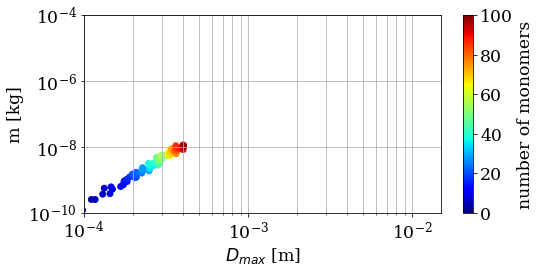

In [203]:
rho_b = 916.8  # bulk density of ice [kg/m3]

phi_idx = 1
r_idx = 0  # 10 microns
nm = np.arange(0,99,1)

# find modes of each variable first and then calculate m and D
rho_i = rho_b*(Ap_modes[phi_idx, r_idx, :]/Ac_modes[phi_idx, r_idx, :])
m_spheroid = 4/3*np.pi*a_modes[phi_idx, r_idx, :]**2*c_modes[phi_idx, r_idx, :]*rho_i # kg
D = D_modes[phi_idx, r_idx,:]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(2, 1, 1)
sc = plt.scatter(D, m_spheroid, c=nm, vmin=0, vmax=100, s=35, cmap='jet')
ax.set_ylim([1E-10, 1E-4])
ax.set_xlim([1E-4, 1.5E-2])
ax.grid(which='major')
ax.grid(which='minor')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$D_{max}$ [m]')
ax.set_ylabel('m [kg]')
cbar = plt.colorbar(sc)
cbar.set_label('number of monomers')

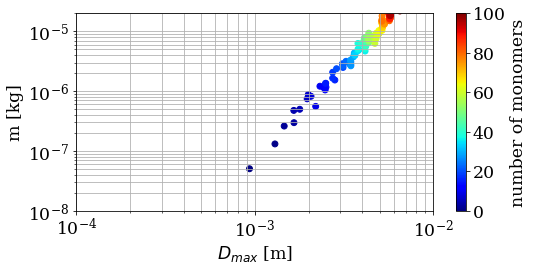

In [208]:
rho_b = 916.8  # bulk density of ice [kg/m3]

phi_idx = 3  # plate
r_idx = 1 # 100 microns
nm = np.arange(0,99,1)  # number of monomers

# find modes of each variable first and then calculate m and D
rho_i = rho_b*(Ap_modes[phi_idx, r_idx, :]/Ac_modes[phi_idx, r_idx, :])
m_spheroid = 4/3*np.pi*a_modes[phi_idx, r_idx, :]**2*c_modes[phi_idx, r_idx, :]*rho_i # kg
D = D_modes[phi_idx, r_idx,:]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(2, 1, 1)

sc = plt.scatter(D, m_spheroid, c=nm, vmin=0, vmax=100, s=35, cmap='jet')
ax.set_ylim([1E-8, 2E-5])
ax.set_xlim([1E-4, 1E-2])
ax.grid(which='major')
ax.grid(which='minor')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$D_{max}$ [m]')
ax.set_ylabel('m [kg]')
cbar = plt.colorbar(sc)
cbar.set_label('number of monomers')

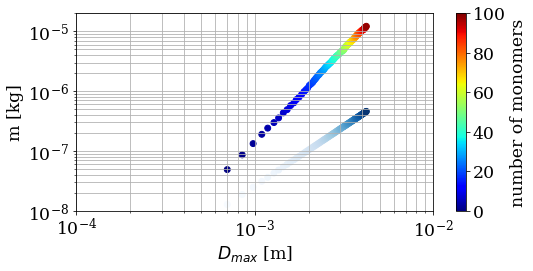

In [207]:
rho_b = 916.8  # bulk density of ice [kg/m3]

phi_idx = 1
r_idx = 1  

nm = np.arange(0,99,1)

rho_i = rho_b*(Aps[phi_idx, r_idx, :, :]/Acs[phi_idx, r_idx, :, :])
m_spheroid = 4/3*np.pi*agg_as[phi_idx, r_idx, :, :]**2*agg_cs[phi_idx, r_idx, :, :]*rho_i # kg
D = Dmaxs[phi_idx, r_idx, :, :]

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(2, 1, 1)

# include Cox (1988)
m_cox = 0.0257*D**2.0
sc = plt.scatter(np.mean(D, axis=0), np.mean(m_cox, axis=0), c=nm, vmin=0, vmax=100, s=35, cmap='Blues')

sc = plt.scatter(np.mean(D, axis=0), np.mean(m_spheroid, axis=0), c=nm, vmin=0, vmax=100, s=35, cmap='jet')
ax.set_ylim([1E-8, 2E-5])
ax.set_xlim([1E-4, 1E-2])
ax.grid(which='major')
ax.grid(which='minor')

ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel('$D_{max}$ [m]')
ax.set_ylabel('m [kg]')
cbar = plt.colorbar(sc)
cbar.set_label('number of monomers')

#### USE VOLUMES TO CALCULATE MASS INSTEAD OF AREAS

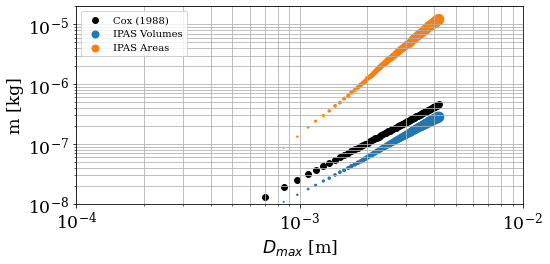

In [24]:
phi_idx = 1  # plate
r_idx = 1 # 100 microns

p = plot.Plots(agg_as, agg_bs, agg_cs, phi_idx, r_idx, Aps, Acs, Vps, Ves, Dmaxs)
p.m_D_volume_plot()


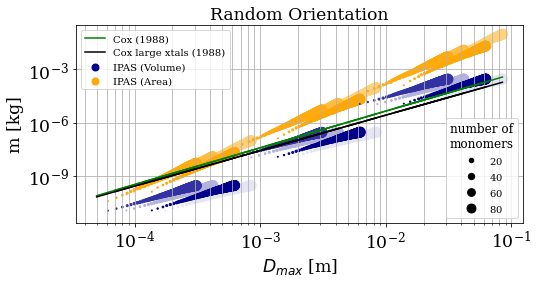

In [114]:
phi_idxs = [0,1,2,3]  
r_idxs = [0,1,2] 
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(2, 1, 1)

p = plot.Plots(ax, agg_as, agg_bs, agg_cs, phi_idxs, r_idxs, Aps, Acs, Vps, Ves, Dmaxs)
p.m_D_plot()
#         self.ax.set_ylim([1e-8, 2e-5])
#         self.ax.set_xlim([1e-4, 1e-2])

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
